## Observations and Insights

## Dependencies and starter code

In [468]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [469]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = df.groupby('Drug Regimen')

#Create summary df
stats_summary = pd.DataFrame({
    'Mean': regimen_df['Tumor Volume (mm3)'].mean(),
    'Median': regimen_df['Tumor Volume (mm3)'].median(),
    'Variance': regimen_df['Tumor Volume (mm3)'].var(),
    'Standard Deviation': regimen_df['Tumor Volume (mm3)'].std(),
    'SEM': regimen_df['Tumor Volume (mm3)'].sem()
})

#Show summary df
stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Data Points')

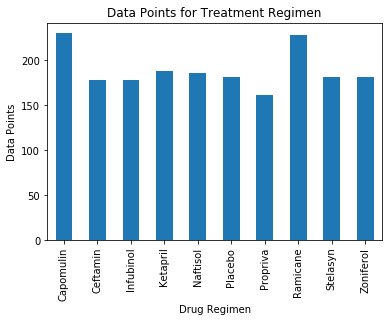

In [470]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
ax = regimen_df['Drug Regimen'].count().plot.bar()
ax.set_title('Data Points for Treatment Regimen')
ax.set_ylabel('Data Points')

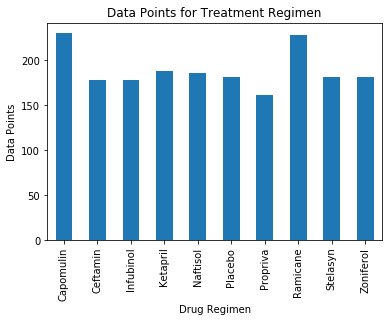

In [471]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
labels = regimen_df['Drug Regimen'].count().index
x_axis = np.arange(0, len(labels))

tick_locations = [value for value in x_axis]

plt.bar(x_axis, regimen_df['Drug Regimen'].count(), width = .5)
plt.xticks(tick_locations, labels, rotation = 'vertical')
plt.title('Data Points for Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.xlim(x_axis.min() - 0.5, x_axis.max() + 0.5)
plt.show()

## Pie plots

Text(0, 0.5, '')

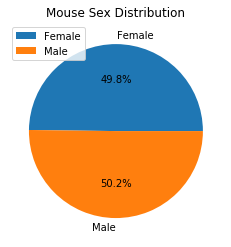

In [472]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = df.groupby('Sex')
sex_df = sex_df['Mouse ID'].nunique()

#Draw plot
ax = sex_df.plot.pie(autopct = '%1.1f%%')
ax.set_title('Mouse Sex Distribution')
ax.legend(loc ='upper left')
ax.set_ylabel('')

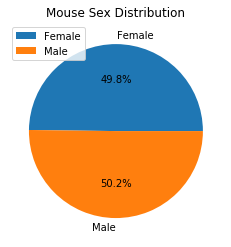

In [473]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_df.index
counts = sex_df

#Draw plot
plt.title('Mouse Sex Distribution')
plt.pie(counts, labels = labels, autopct = '%1.1f%%')
plt.legend(loc = 'upper left')
plt.show()

## Quartiles, outliers and boxplots

In [474]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens

####################CAPOMULIN####################
#Sort df
capo_df = df[df['Drug Regimen'] == 'Capomulin']
capo_df = capo_df.sort_values('Timepoint', ascending = False)
capo_df = capo_df.groupby('Mouse ID').first()
capo_vol = capo_df['Tumor Volume (mm3)']

#Calculate quartiles
capo_q1 = capo_vol.quantile(0.25)
capo_q2 = capo_vol.quantile(0.50)
capo_q3 = capo_vol.quantile(0.75)
capo_iqr = capo_q3 - capo_q1

#Calculate bounds
capo_lower = capo_q1 - (1.5 * capo_iqr)
capo_upper = capo_q3 + (1.5 * capo_iqr)

#Determine if outliers present
capo_outlier = 'No'
for vol in capo_vol:
    if(vol < capo_lower or vol > capo_upper):
        capo_outlier = 'Yes'
        break

#Print out results
print(f'Treatment Regimen: Capomulin')
print(f'Mean: {round(capo_vol.mean(),2)}')
print(f'Q1: {round(capo_q1,2)}')
print(f'Q2: {round(capo_q2,2)}')
print(f'Q3: {round(capo_q3,2)}')
print(f'IQR: {round(capo_iqr,2)}')
print(f'Lower bound: {round(capo_lower,2)}')
print(f'Upper bound: {round(capo_upper,2)}')
print(f'Outliers present: {capo_outlier}\n')

####################RAMICANE####################
#Sort df
rami_df = df[df['Drug Regimen'] == 'Ramicane']
rami_df = rami_df.sort_values('Timepoint', ascending = False)
rami_df = rami_df.groupby('Mouse ID').first()
rami_vol = rami_df['Tumor Volume (mm3)']

#Calculate quartiles
rami_q1 = rami_vol.quantile(0.25)
rami_q2 = rami_vol.quantile(0.50)
rami_q3 = rami_vol.quantile(0.75)
rami_iqr = rami_q3 - rami_q1

#Calculate bounds
rami_lower = rami_q1 - (1.5 * rami_iqr)
rami_upper = rami_q3 + (1.5 * rami_iqr)

#Determine if outliers present
rami_outlier = 'No'
for vol in rami_vol:
    if(vol < rami_lower or vol > rami_upper):
        rami_outlier = 'Yes'
        break

#Print out results
print(f'Treatment Regimen: Ramicane')
print(f'Mean: {round(rami_vol.mean(),2)}')
print(f'Q1: {round(rami_q1,2)}')
print(f'Q2: {round(rami_q2,2)}')
print(f'Q3: {round(rami_q3,2)}')
print(f'IQR: {round(rami_iqr,2)}')
print(f'Lower bound: {round(rami_lower,2)}')
print(f'Upper bound: {round(rami_upper,2)}')
print(f'Outliers present: {rami_outlier}\n')

####################INFUBINOL####################
#Sort df
infu_df = df[df['Drug Regimen'] == 'Infubinol']
infu_df = infu_df.sort_values('Timepoint', ascending = False)
infu_df = infu_df.groupby('Mouse ID').first()
infu_vol = infu_df['Tumor Volume (mm3)']

#Calculate quartiles
infu_q1 = infu_vol.quantile(0.25)
infu_q2 = infu_vol.quantile(0.50)
infu_q3 = infu_vol.quantile(0.75)
infu_iqr = infu_q3 - infu_q1

#Calculate bounds
infu_lower = infu_q1 - (1.5 * infu_iqr)
infu_upper = infu_q3 + (1.5 * infu_iqr)

#Determine if outliers present
infu_outlier = 'No'
for vol in infu_vol:
    if(vol < infu_lower or vol > infu_upper):
        infu_outlier = 'Yes'
        break

#Print out results
print(f'Treatment Regimen: Infubinol')
print(f'Mean: {round(infu_vol.mean(),2)}')
print(f'Q1: {round(infu_q1,2)}')
print(f'Q2: {round(infu_q2,2)}')
print(f'Q3: {round(infu_q3,2)}')
print(f'IQR: {round(infu_iqr,2)}')
print(f'Lower bound: {round(infu_lower,2)}')
print(f'Upper bound: {round(infu_upper,2)}')
print(f'Outliers present: {infu_outlier}\n')

####################CEFTAMIN####################
#Sort df
ceft_df = df[df['Drug Regimen'] == 'Ceftamin']
ceft_df = ceft_df.sort_values('Timepoint', ascending = False)
ceft_df = ceft_df.groupby('Mouse ID').first()
ceft_vol = ceft_df['Tumor Volume (mm3)']

#Calculate quartiles
ceft_q1 = ceft_vol.quantile(0.25)
ceft_q2 = ceft_vol.quantile(0.50)
ceft_q3 = ceft_vol.quantile(0.75)
ceft_iqr = ceft_q3 - ceft_q1

#Calculate bounds
ceft_lower = ceft_q1 - (1.5 * ceft_iqr)
ceft_upper = ceft_q3 + (1.5 * ceft_iqr)

#Determine if outliers present
ceft_outlier = 'No'
for vol in ceft_vol:
    if(vol < ceft_lower or vol > ceft_upper):
        ceft_outlier = 'Yes'
        break

#Print out results
print(f'Treatment Regimen: Ceftamin')
print(f'Mean: {round(ceft_vol.mean(),2)}')
print(f'Q1: {round(ceft_q1,2)}')
print(f'Q2: {round(ceft_q2,2)}')
print(f'Q3: {round(ceft_q3,2)}')
print(f'IQR: {round(ceft_iqr,2)}')
print(f'Lower bound: {round(ceft_lower,2)}')
print(f'Upper bound: {round(ceft_upper,2)}')
print(f'Outliers present: {ceft_outlier}\n')

Treatment Regimen: Capomulin
Mean: 36.67
Q1: 32.38
Q2: 38.13
Q3: 40.16
IQR: 7.78
Lower bound: 20.7
Upper bound: 51.83
Outliers present: No

Treatment Regimen: Ramicane
Mean: 36.19
Q1: 31.56
Q2: 36.56
Q3: 40.66
IQR: 9.1
Lower bound: 17.91
Upper bound: 54.31
Outliers present: No

Treatment Regimen: Infubinol
Mean: 58.18
Q1: 54.05
Q2: 60.17
Q3: 65.53
IQR: 11.48
Lower bound: 36.83
Upper bound: 82.74
Outliers present: Yes

Treatment Regimen: Ceftamin
Mean: 57.75
Q1: 48.72
Q2: 59.85
Q3: 64.3
IQR: 15.58
Lower bound: 25.36
Upper bound: 87.67
Outliers present: No



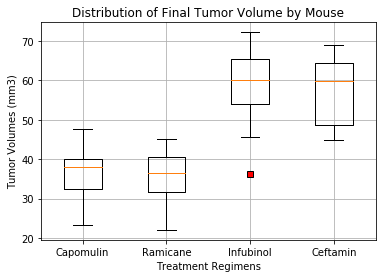

In [475]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Distribution of Final Tumor Volume by Mouse')
ax.set_xlabel('Treatment Regimens')
ax.set_ylabel('Tumor Volumes (mm3)')
ax.grid()
ax.boxplot([capo_vol, rami_vol, infu_vol, ceft_vol], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] , flierprops = dict(markerfacecolor = 'r', marker = 's'))
plt.show()

## Line and scatter plots

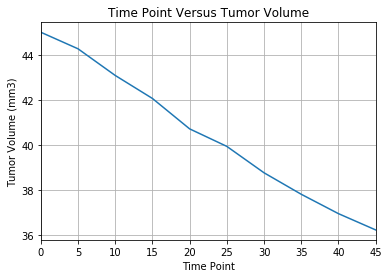

In [476]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_line_plot = df[df['Drug Regimen'] == 'Capomulin'].groupby('Timepoint')
plt.plot(capo_line_plot['Tumor Volume (mm3)'].mean())
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(np.arange(0, 50, step = 5))
plt.xlim(0, 45)
plt.title('Time Point Versus Tumor Volume')
plt.grid()
plt.show()

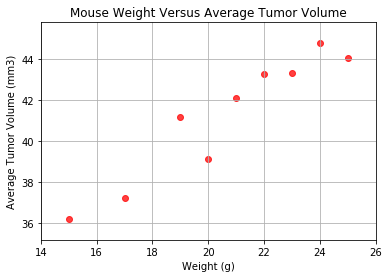

In [477]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_scatter_plot = df[df['Drug Regimen'] == 'Capomulin'].groupby('Weight (g)', as_index = False)

#Set data for plot
weight = capo_scatter_plot['Tumor Volume (mm3)'].mean()['Weight (g)']
mean = capo_scatter_plot['Tumor Volume (mm3)'].mean()['Tumor Volume (mm3)']

# Create scatter plot
plt.scatter(weight, mean, marker = 'o', facecolors = 'r', alpha = 0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlim(weight.min()-1, weight.max() + 1)
plt.ylim(mean.min() -1, mean.max() + 1)
plt.grid()
plt.show()

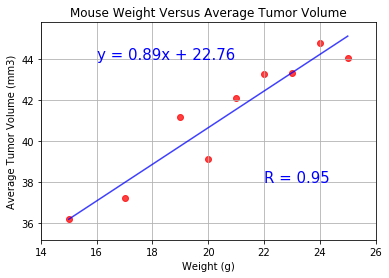

In [478]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, mean)
regress_values = weight * slope + intercept
corr_coeff = f'R = {round(rvalue, 2)}'
regress_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create scatter plot
plt.scatter(weight, mean, marker = 'o', facecolors = 'r', alpha = 0.75)
plt.plot(weight, regress_values, color = 'b', alpha = 0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlim(weight.min()-1, weight.max() + 1)
plt.ylim(mean.min() -1, mean.max() + 1)
plt.annotate(corr_coeff, (22, 38), fontsize = 15, color = 'b')
plt.annotate(regress_eq, (16, 44), fontsize = 15, color = 'b')
plt.grid()
plt.show()